#####   BackGround ::: The data we used is from the National 2009 H1N1 Flu Survey collected to monitor vaccination rates during H1N1 flu campaign. Its a phone survey asked people whether they had received H1N1 and seasonal flu vaccines, some personal information about opinions, and behaviors. We use this data to predict if a person took the H1N1 vaccine

### Import data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### labels or Y data 
target = pd.read_csv("./training_set_labels.csv", index_col=0)
target.shape

(26707, 2)

### Finding the number of rows and columns in the Training and Test set 

In [2]:
# Features or X in training set
features = pd.read_csv("./training_set_features.csv", index_col=0)
features.shape

In [ ]:
# Features or X in test set...since we are not using this can we delete this step??
test_set_features = pd.read_csv("./test_set_features.csv", index_col=0)
test_set_features.shape

(26708, 35)

### Checking the data fields in the features data set

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

### Histogram to analyse the data and know the values in each of the fields and their range

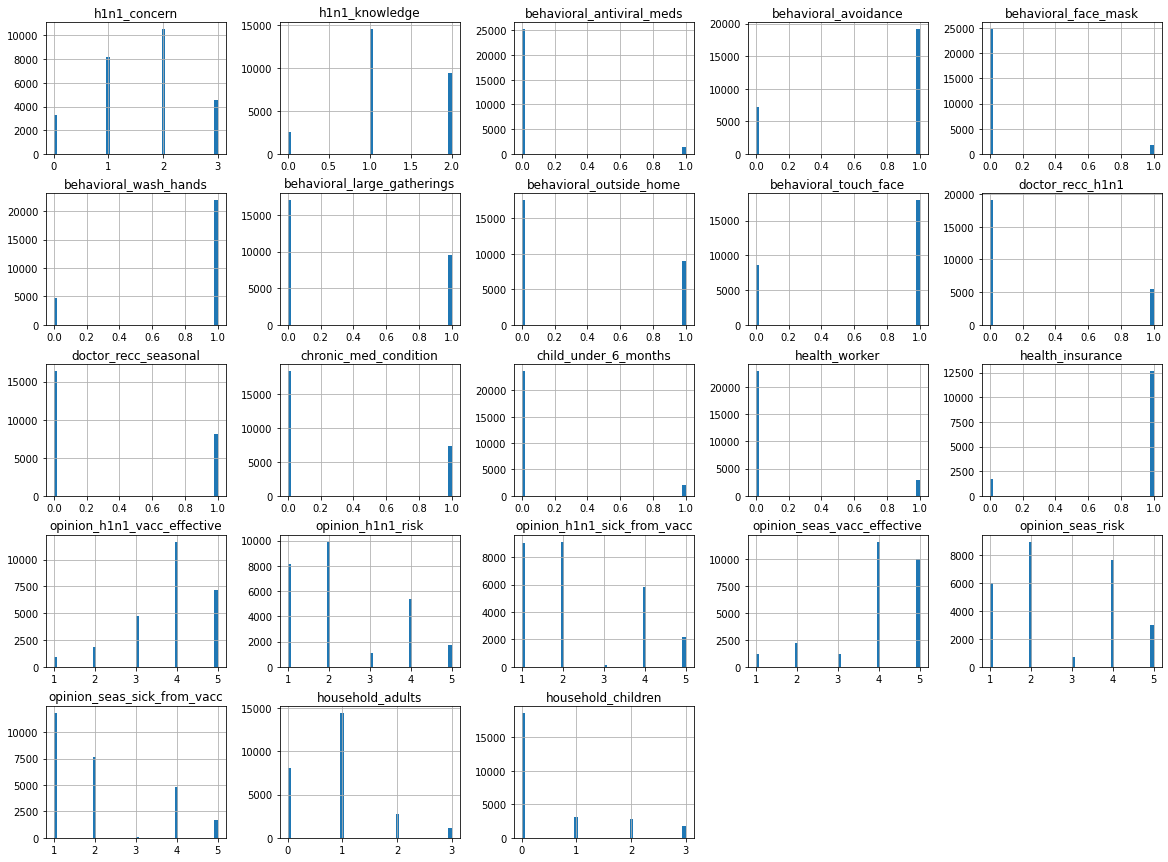

In [ ]:
features.hist(bins=50,figsize=(20,15))
plt.show()

### Process to identify NULL values that have to be treated approproately based on what type field it is 

In [ ]:
# Searching for null values.
features.isna().sum() 

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### Pie Charts to understand more about the data features

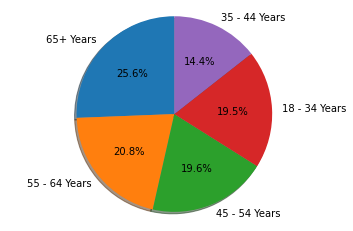

In [ ]:
### Age group plot

age_group_countes = features["age_group"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(age_group_countes, labels=age_group_countes.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

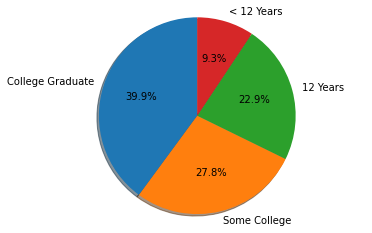

In [ ]:
### education group plot

education_group_countes = features["education"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(education_group_countes, labels=education_group_countes.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

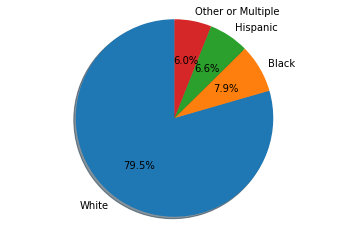

In [ ]:
### Race  plot

race_group_countes = features["race"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(race_group_countes, labels=race_group_countes.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

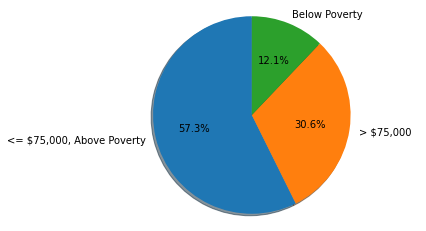

In [ ]:
### Income poverty plot
income_poverty_group_countes = features["income_poverty"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(income_poverty_group_countes, labels=income_poverty_group_countes.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Data pipelines for imputing NULL or missing values ,Scaling the data and encoding data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

### pipeline for handling numeric values inputing with mode and scaling data

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("scaler", StandardScaler())
    ])

### pipeline for hardcoding values and also scaling data
# The constant on here is ZERO, as we will assume that missing values on 
# This is for health_insurance are those who are not covered.

hardcoded_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="constant")),
        ("scaler", StandardScaler())
    ])

###check this with Luis as to what he means by non weight

one_hot_encoder_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

###Categorical values pipeline
# Indicating to pipeline replace those null values with
# the most frequent value found in that specific row.

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OrdinalEncoder()),
    ])



In [ ]:
#### Separating features or attributes into numeric, hardcoded or categorical for pipeline purposes

num_attribs = ["h1n1_concern", "h1n1_knowledge", "behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face", "doctor_recc_h1n1", "doctor_recc_seasonal", "chronic_med_condition", "child_under_6_months", "health_worker", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc"]
hardcoded_attribs = ["health_insurance"]
one_hot_encoder_attribs = ["race", "sex", "hhs_geo_region", "employment_industry", "employment_occupation"]
cat_attribs = ["age_group", "education", "income_poverty", "marital_status", "rent_or_own", "employment_status", "census_msa", "household_adults", "household_children"]

In [ ]:
#### combining all the pipelines togther to apply to features data 

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("hardcoded", hardcoded_pipeline, hardcoded_attribs),
        ("non_weight", one_hot_encoder_pipeline, one_hot_encoder_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
total_attribs = num_attribs + hardcoded_attribs + one_hot_encoder_attribs + cat_attribs


In [ ]:
#### fit all the pipelines together to features data 

x_features_transformed = preprocess_pipeline.fit_transform(
    features[total_attribs])

In [ ]:
### label or Y data
    
y_labels = target["h1n1_vaccine"]
y_labels

respondent_id
0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

### Splitting data data into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_features_transformed, y_labels, test_size=0.3, random_state=42)

### Logistic Regression Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Please, check the variables applicable to next line:
logistic_clf = LogisticRegression(max_iter=400)
logistic_clf.fit(X_train, y_train)

y_pred = logistic_clf.predict(X_test)
print("mean_squared_error: {}".format(mean_squared_error(y_test, y_pred)))
print("mean_accuracy_score: {}".format(logistic_clf.score(X_train, y_train)))
# Please, "MARK 1" below to check this that code is needed.

mean_squared_error: 0.15200299513290902
mean_accuracy_score: 0.853000962875789


#### Cross validation with training data for logistic regression

In [ ]:
from sklearn.model_selection import cross_val_score

logistic_scores = cross_val_score(logistic_clf, X_train, y_train, cv=5)
logistic_scores.mean()

0.851182273066091

#### Accuracy, Precision, Recall and F1 score for logistic regression

Here we uses the accuracy_score from sklearn.metrics to calculate the accuracy of the model. The accuracy_score function computes subset accuracy: the set of predicted labels (y_pred) compared to the true set of labels (y_test). The accuracy_score function returns the fraction of correct predictions. The best performance is 1 with 0 indicating random performance. 


precision_score is used to calculate the precision of the model. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. It shows the percentage of the model correctly predict the target. The best value is 1 and the worst value is 0.

recall_score is used to calculate the recall of the model. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. It shows the percentage of cases from the dataset it corectly predicted. The best value is 1 and the worst value is 0. If a recall score is low, it means that most of the positive cases are not identified correctly, even if its precision_score is high.

f1_score is used to calculate the f1_score of the model. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. It shows that the relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall) (p.95 from the book). 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# X_train_transformed.shape
# model is for logistic
logistic_clf_y_pred = logistic_clf.predict(X_test)
logistic_clf_y_pred_proba = logistic_clf.predict_proba(X_test) #to calculate ROC_AUC, we need model.predict_proba() instead of model.pred()

print("accuracy_score: {}".format(accuracy_score(y_test, logistic_clf_y_pred)))
print("precision_score: {}".format(precision_score(y_test, logistic_clf_y_pred)))
print("recall_score: {}".format(recall_score(y_test, logistic_clf_y_pred)))
print("f1_score: {}".format(f1_score(y_test, logistic_clf_y_pred)))

accuracy_score: 0.847997004867091
precision_score: 0.7076788830715532
recall_score: 0.4787485242030697
f1_score: 0.5711267605633802


In [ ]:
y_test

respondent_id
15772    0
9407     0
16515    0
23353    0
10008    0
        ..
19075    0
25430    0
25864    0
5874     0
22235    1
Name: h1n1_vaccine, Length: 8013, dtype: int64

In [ ]:
logistic_clf_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Hyperparameter tuning for logistic regression using grid search

In [ ]:
# Tuning LogisticRegression with GridSearchCV
# Execution time: 2m
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression(max_iter=1000)
parameters_grid = [
  {'penalty':['none','l2']},
  {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
  {'tol': [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
  {'solver':['lbfgs']}
]
grid_search_logreg_cv = GridSearchCV(estimator = logreg,  
                           param_grid = parameters_grid,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,
                           verbose=0)

grid_search_logreg_cv.fit(X_train, y_train)   
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_search_logreg_cv.best_params_))
print("neg_mean_squared_error {}".format(grid_search_logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'penalty': 'l2'}
neg_mean_squared_error -0.14881772693390893


In [ ]:
#### Best estimator for grid search
grid_search_logreg_cv.best_estimator_


LogisticRegression(max_iter=1000)

In [ ]:
####evaluation scores for grid search
cvres = grid_search_logreg_cv.cv_results_
for mean_score,params in zip (cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

0.3859769021953174 {'penalty': 'none'}
0.3857690072231165 {'penalty': 'l2'}
0.45949669972329843 {'C': 0.0001}
0.39771745855916646 {'C': 0.001}
0.38597706902999906 {'C': 0.01}
0.38590764103600234 {'C': 0.1}
0.3857690072231165 {'C': 1}
0.3860462065299699 {'C': 10}
0.3857690072231165 {'tol': 1e-05}
0.3857690072231165 {'tol': 0.0001}
0.3857690072231165 {'tol': 0.001}
0.3857690072231165 {'tol': 0.01}
0.3857690072231165 {'tol': 0.1}
0.3860462250638324 {'tol': 1}
0.3858382747244958 {'tol': 10}
0.3898381823092449 {'tol': 100}
0.3857690072231165 {'solver': 'lbfgs'}


### Hyperparameter tuning for logistic regression using randomized search

In [ ]:
# Tuning LogisticRegression with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters_random = [
  {'penalty':['none','l2']},
  {'C': list(range(10))},
  {'tol': np.linspace(0.00001, 100)},
  {'solver':['lbfgs']}
]

random_search_logreg_cv = RandomizedSearchCV(estimator = logreg,  
                           param_distributions = parameters_random,
                           scoring = 'neg_mean_squared_error',
                           n_iter = 5,
                           verbose=1)

random_search_logreg_cv.fit(X_train, y_train)   

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(random_search_logreg_cv.best_params_))
print("neg_mean_squared_error {}".format(random_search_logreg_cv.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuned Logistic Regression Parameters: {'penalty': 'l2'}
neg_mean_squared_error -0.14881772693390893


In [ ]:
#### Best estimator for randomised search
random_search_logreg_cv.best_estimator_

LogisticRegression(max_iter=1000)

In [ ]:
####evaluation scores for random search
cvres1 = random_search_logreg_cv.cv_results_
for mean_score,params in zip (cvres1["mean_test_score"],cvres1["params"]):
    print(np.sqrt(-mean_score),params)

0.3859076224954841 {'C': 4}
0.3857690072231165 {'penalty': 'l2'}
0.38798144360140985 {'tol': 65.30612591836734}
0.3876365279996212 {'tol': 63.26530979591836}
0.38687674222157487 {'tol': 42.85714857142857}


### Random Forest Classifier modelling to fit the features to labels

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=36, random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf_X_test = preprocess_pipeline.transform(test_set_features[total_attribs])### why is it like this?? not like logit regrssion
forest_clf_y_pred = forest_clf.predict(X_test)



### Cross validation for training data in random forest

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=5)
forest_scores.mean()

0.830801318967956

#### Accuracy, Precision , Recall and FI score for Random Forest Classifier

In [ ]:
# Checking the accuracy, precision , recall and f1 scores for random forest classification
print("accuracy_score: {}".format(accuracy_score(y_test, forest_clf_y_pred)))
print("precision_score: {}".format(precision_score(y_test, forest_clf_y_pred)))
print("recall_score: {}".format(recall_score(y_test, forest_clf_y_pred)))
print("f1_score: {}".format(f1_score(y_test, forest_clf_y_pred)))


accuracy_score: 0.8297766130038687
precision_score: 0.8540772532188842
recall_score: 0.23494687131050768
f1_score: 0.3685185185185185


In [ ]:
y_test

respondent_id
15772    0
9407     0
16515    0
23353    0
10008    0
        ..
19075    0
25430    0
25864    0
5874     0
22235    1
Name: h1n1_vaccine, Length: 8013, dtype: int64

In [ ]:
forest_clf_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Hyperparameter tuning for Random Forest Classification with grid search

In [ ]:
# Tuning RandomForestClassifier with GridSearchCV
# Time to execute: 3min
from sklearn.model_selection import GridSearchCV
forest_clf = RandomForestClassifier(random_state=42)
parameters_grid = [
  {'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]},
  {'max_leaf_nodes': [20, 40, 80, 100, 120, 150, 170, 200]},
  {'max_features': ['sqrt','log2']},
  {'min_weight_fraction_leaf': [0,0.0005, 0.05, 0.1, 0.15]}
]
grid_search_forest_clf = GridSearchCV(estimator = forest_clf,  
                           param_grid = parameters_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search_forest_clf.fit(X_train, y_train)   

# Print the tuned parameters and score
print("Tuned Random forest classification Parameters: {}".format(grid_search_forest_clf.best_params_))
print("Best score: {}".format(grid_search_forest_clf.best_score_))

Fitting 5 folds for each of 23 candidates, totalling 115 fits
Tuned Random forest classification Parameters: {'n_estimators': 175}
Best score: 0.85080758382248


In [ ]:
#### Best estimator for grid search for random forest
grid_search_forest_clf.best_estimator_

RandomForestClassifier(n_estimators=175, random_state=42)

In [ ]:
####evaluation scores for grid search for random forest
cvres_rf = grid_search_forest_clf.cv_results_
for mean_score,params in zip (cvres_rf["mean_test_score"],cvres_rf["params"]):
    print((mean_score),params)

0.846848805363219 {'n_estimators': 25}
0.8493631327478027 {'n_estimators': 50}
0.8497377790618488 {'n_estimators': 75}
0.8496308272054958 {'n_estimators': 100}
0.8497378219914138 {'n_estimators': 125}
0.8502192055139879 {'n_estimators': 150}
0.85080758382248 {'n_estimators': 175}
0.8498981782266684 {'n_estimators': 200}
0.8228308012760385 {'max_leaf_nodes': 20}
0.831443287683465 {'max_leaf_nodes': 40}
0.8374879135387113 {'max_leaf_nodes': 80}
0.8385043425401509 {'max_leaf_nodes': 100}
0.8395206713726056 {'max_leaf_nodes': 120}
0.8406974709191548 {'max_leaf_nodes': 150}
0.8413929012529853 {'max_leaf_nodes': 170}
0.8418742132262842 {'max_leaf_nodes': 200}
0.8496308272054958 {'max_features': 'sqrt'}
0.8455118642292405 {'max_features': 'log2'}
0.8496308272054958 {'min_weight_fraction_leaf': 0}
0.8478654776321941 {'min_weight_fraction_leaf': 0.0005}
0.789825464129415 {'min_weight_fraction_leaf': 0.05}
0.7870974619898053 {'min_weight_fraction_leaf': 0.1}
0.7870974619898053 {'min_weight_fract

### Hyperparameter tuning with randomized search for Random Forest Classifier

In [ ]:
# Tuning RandomForestClassifier with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

forest_clf = RandomForestClassifier(random_state=42)

parameters_random = [
  {'n_estimators': list(range(201))},
  {'max_leaf_nodes': [20, 40, 80, 100, 120, 150, 170, 200]},
  {'max_features': ['sqrt','log2']},
  {'min_weight_fraction_leaf': np.linspace(0, 0.15, 30)}
]

random_search_forest_clf = RandomizedSearchCV(estimator = forest_clf,  
                           param_distributions = parameters_random,
                           scoring = 'accuracy',
                           n_iter = 7,
                           verbose=1)

random_search_forest_clf.fit(X_train, y_train)   

# Print the tuned parameters and score
print("Tuned Random Forest Classifier  Parameters: {}".format(random_search_forest_clf.best_params_))
print("Best score: {}".format(random_search_forest_clf.best_score_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tuned Random Forest Classifier  Parameters: {'n_estimators': 22}
Best score: 0.8446021008870537


In [ ]:
#### Best estimator for random  search for random forest
random_search_forest_clf.best_estimator_

RandomForestClassifier(n_estimators=22, random_state=42)

In [ ]:
####evaluation scores for random search for random forest
cvres_rf = random_search_forest_clf.cv_results_
for mean_score,params in zip (cvres_rf["mean_test_score"],cvres_rf["params"]):
    print((mean_score),params)

0.8440137368884164 {'n_estimators': 19}
0.7870974619898053 {'min_weight_fraction_leaf': 0.12413793103448276}
0.8344923171103937 {'min_weight_fraction_leaf': 0.005172413793103448}
0.8423019777221314 {'n_estimators': 15}
0.8446021008870537 {'n_estimators': 22}
0.8044827051807829 {'n_estimators': 2}
0.7870974619898053 {'min_weight_fraction_leaf': 0.08793103448275862}


### SVC modelling to fit features to labels

In [ ]:

from sklearn.svm import SVC

svc_clf = SVC(kernel="rbf",coef0=1, C= 10)
svc_clf.fit(X_train, y_train)
###svc_clf_X_test = preprocess_pipeline.transform(test_set_features[total_attribs])
svc_clf_y_pred = svc_clf.predict(X_test)

### Crossvalidation for SVC

In [ ]:
from sklearn.model_selection import cross_val_score

svc_clf_scores = cross_val_score(svc_clf, X_train, y_train, cv=5)
svc_clf_scores.mean()

0.8399487936148281

### Accuracy, Precision , Recall and Fi score for SVC

In [ ]:
# Checking the accuracy, precision , recall and f1 scores for random forest classification
print("accuracy_score: {}".format(accuracy_score(y_test, svc_clf_y_pred)))
print("precision_score: {}".format(precision_score(y_test, svc_clf_y_pred)))
print("recall_score: {}".format(recall_score(y_test, svc_clf_y_pred)))
print("f1_score: {}".format(f1_score(y_test, svc_clf_y_pred)))
# Review if this is needed:
# forest_clf_y_pred_proba = forest_clf.predict_proba(X_test) #to calculate ROC_AUC, we need model.predict_proba() instead of model.pred()


accuracy_score: 0.8408835642081617
precision_score: 0.6707416462917686
recall_score: 0.4858323494687131
f1_score: 0.563505648750428


In [ ]:
y_test

respondent_id
15772    0
9407     0
16515    0
23353    0
10008    0
        ..
19075    0
25430    0
25864    0
5874     0
22235    1
Name: h1n1_vaccine, Length: 8013, dtype: int64

In [ ]:
svc_clf_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Hyperparameer tuning for SVC by using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
svc_clf = SVC(random_state=42)
parameters_grid = [
  {'kernel': ["linear", "rbf", "sigmoid"]},
  {'C': [1, 3, 5]},
  {'gamma': ['scale','auto']},
  {'max_iter': [10,100,1000]}
]
grid_search_svc_clf = GridSearchCV(estimator = svc_clf,  
                           param_grid = parameters_grid,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=1)

grid_search_svc_clf.fit(X_train, y_train)   

# Print the tuned parameters and score
print("Tuned SVC classification Parameters: {}".format(grid_search_svc_clf.best_params_))
print("Best score: {}".format(grid_search_svc_clf.best_score_))

Fitting 2 folds for each of 11 candidates, totalling 22 fits


c:\Users\davie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\davie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\davie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\davie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\davie

Tuned SVC classification Parameters: {'kernel': 'rbf'}
Best score: 0.8524660318818872


In [ ]:
#### Best estimator for SVC
grid_search_svc_clf.best_estimator_

SVC(random_state=42)

In [ ]:
####evaluation scores for svc grid search
cvres_svc = grid_search_svc_clf.cv_results_
for mean_score,params in zip (cvres_svc["mean_test_score"],cvres_svc["params"]):
    print((mean_score),params)

0.8493099390178667 {'kernel': 'linear'}
0.8524660318818872 {'kernel': 'rbf'}
0.7716379587033273 {'kernel': 'sigmoid'}
0.8524660318818872 {'C': 1}
0.8498448700117684 {'C': 3}
0.8458328875575051 {'C': 5}
0.8524660318818872 {'gamma': 'scale'}
0.8508077458007917 {'gamma': 'auto'}
0.7025783673906066 {'max_iter': 10}
0.5738204771584465 {'max_iter': 100}
0.7603509147319996 {'max_iter': 1000}


### Hyperparameter tuning for SVR ( where is the model fitting??)

In [ ]:
# Tuning SVR with GridSearchCV
# Execution time: around 30m
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30.]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0],
         'gamma': [0.01, 0.1]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=2, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=2, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0], 'kernel': ['linear']},
                         {'C': [1.0, 3.0], 'gamma': [0.01, 0.1],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Tuning SVR with RandomizedSearchCV
# Execution time: around 30m

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=10, cv=2, scoring='neg_mean_squared_error',
                                verbose=1, random_state=42)
rnd_search.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


In [ ]:
rnd_search_y_pred = rnd_search.predict(X_test)

In [ ]:
print("accuracy_score: {}".format(accuracy_score(y_test, rnd_search_y_pred)))
print("precision_score: {}".format(precision_score(y_test, rnd_search_y_pred)))
print("recall_score: {}".format(recall_score(y_test, rnd_search_y_pred)))
print("f1_score: {}".format(f1_score(y_test, rnd_search_y_pred)))

### Graph for various models 

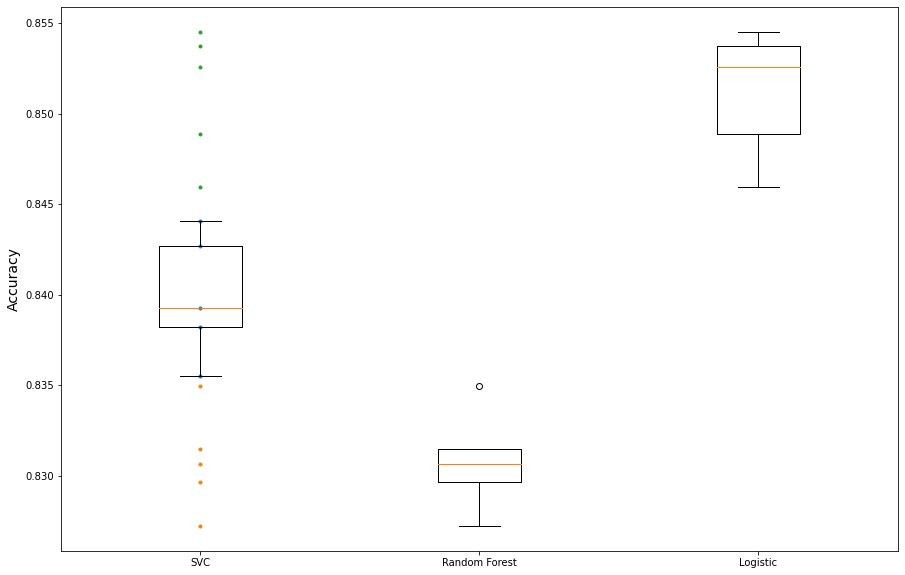

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot([1]*5, svc_clf_scores, ".")
plt.plot([1]*5, forest_scores, ".")
plt.plot([1]*5, logistic_scores, ".")


plt.boxplot([svc_clf_scores, forest_scores, logistic_scores], labels=("SVC","Random Forest", "Logistic"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

## Precision/Recall Tradeof and limitation of the project

With high accruacy of our model, we have the confidence to predict person who will defintely take the vaccine (True positive cases). However, we also need to consider the precision and recall of the model depending on the different use of our model. So that we know how many minimum number of people who will take the vaccine.  
In the future, if the model is used to predict who we will to contact to take the vaccine, we will probably need to have a higher recall score, so that even the person who is false negative to take the vaccine, we will not miss any of them. However, if the model is used to predict who we will not to contact to take the vaccine, we will probably need to have a higher precision score, so that we will not waste our time and resource to contact people who will not take the vaccine.